In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
hbar = 1e-27 # erg.s, Planck's constant
h_Planck = hbar * 2*np.pi # erg.s, Planck's constant
c = 3e10 # cm/s, speed of light
m_p = 1.6e-24 # g, proton mass
a0 = 0.5e-8 # cm, Bohr radius
kB = 1.4e-16 # erg/K, Boltzmann constant

m_C = 12*m_p
m_O = 16*m_p
parallel = lambda lst: (sum([1/x for x in lst]))**-1 if 0 not in lst else 0
mu_CO = parallel([m_C, m_O]) # g, reduced mass of CO molecule
x = a0 # cm, separation between atoms

I = mu_CO * x**2 # moment of inertia

q = 5e-10 # esu, electron charge
k = q**2 / x**3 # spring constant
omega0 = np.sqrt(k/mu_CO) # rad/s, natural frequency of CO vibrational transition
nu0 = omega0/(2*np.pi)

E_rot = lambda J: hbar**2/(2*I) * J * (J+1)
E_vib = lambda n: hbar * omega0 * (n + 0.5)
E_rovib = lambda J,n: E_rot(J) + E_vib(n)
g_degen = lambda J: 2*J+1

<h1>1</h1>

In [3]:
k_center = 2145 # cycles/cm, center wavenumber

nu_center = k_center*c # Hz
Delta_n = nu_center/nu0
print(f'Delta n (Computed):\t{Delta_n}')
print("nu_center:\t\t{:.2e} Hz".format(nu_center))
print(f'n:\t\t\t{int(round(Delta_n))} -> 0')

Delta n (Computed):	0.9469891687821947
nu_center:		6.44e+13 Hz
n:			1 -> 0


<h1>2</h1>

dE_vib: 4.2695628191498324e-13
dE_rot: 3.645833333333333e-15
dE_rot: 7.291666666666666e-15
dE_rot: 1.0937499999999999e-14
dE_rot: 1.4583333333333335e-14
dE_rot: 1.8229166666666667e-14
dE_rot: 2.1874999999999995e-14
dE_rot: 2.5520833333333323e-14
dE_rot: 2.916666666666668e-14
dE_rot: 3.281249999999999e-14
dE_rot: 3.645833333333336e-14


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in exp


Text(0,0.5,'$n_{J+1, n=0}/n_{J, n=1}$')

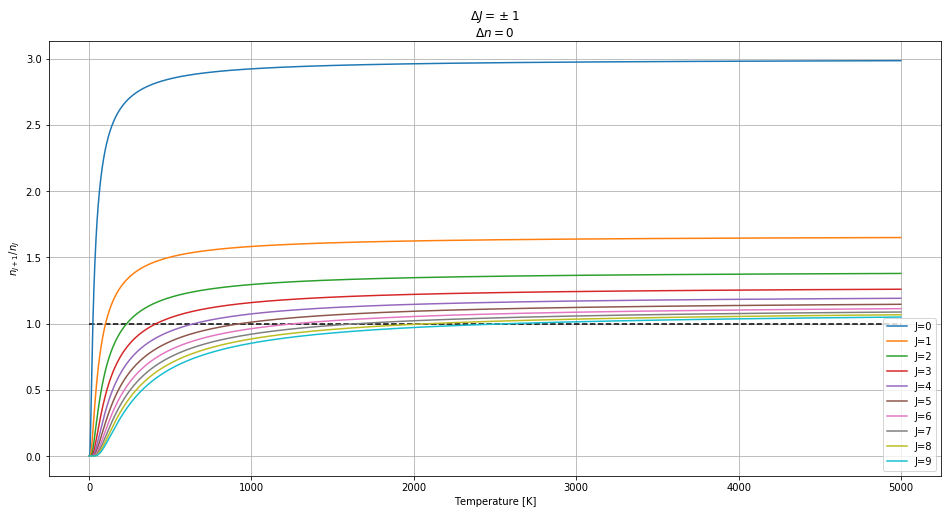

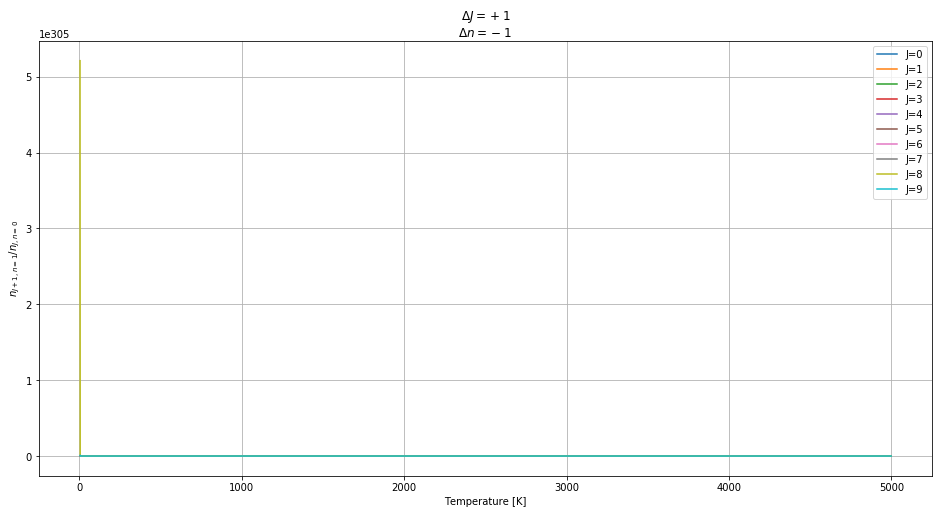

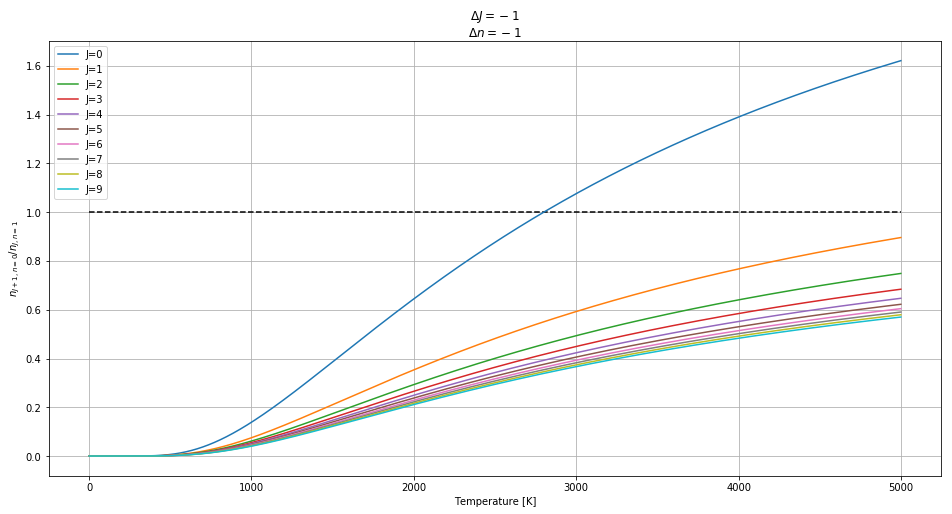

In [13]:
J_vec = np.array(range(10))
T_vec = np.arange(1, 5000, 1)

plt.rcParams['figure.figsize'] = (16, 8)

dE_vib = E_vib(1) - E_vib(0)
print(f'dE_vib: {dE_vib}')

# Keeping track of the temperature at which the ratio n_{J+1}/n_J exceeds 1
T_cross1_J = [0]*len(J_vec)

fig_rot = plt.figure()
fig_rovib_incr = plt.figure()
fig_rovib_decr = plt.figure()

for i,J in enumerate(J_vec):
    dE_rot = E_rot(J+1) - E_rot(J)
    print(f'dE_rot: {dE_rot}')
    
    # Strictly rotational transitions
    ratio_nJ = g_degen(J+1)/g_degen(J) * np.exp(-dE_rot/(kB*T_vec))
    plt.figure(fig_rot.number)
    plt.plot(T_vec, ratio_nJ, label=f'J={J}')

    idx_cross1_J = np.argwhere(np.diff(np.sign(ratio_nJ-1))).flatten()
    assert len(idx_cross1_J) < 2, f'J={J}: ratio does not monotonically increase with temperature'
    if len(idx_cross1_J) == 1:
        T_cross1_J[i] = T_vec[idx_cross1_J[0]]

    # Incorporating vibrational transitions
    dE_rovib_decr = E_rovib(J+1, 1) - E_rovib(J, 0) # J+1 -> J
    dE_rovib_incr = E_rovib(J+1, 0) - E_rovib(J, 1) # J -> J+1
    
    ratio_nJ_decr = g_degen(J+1)/g_degen(J) * np.exp(-dE_rovib_decr/(kB*T_vec))
    ratio_nJ_incr = g_degen(J+1)/g_degen(J) * np.exp(-dE_rovib_incr/(kB*T_vec))
    
    plt.figure(fig_rovib_decr.number)
    plt.plot(T_vec, ratio_nJ_decr, label=f'J={J}')
    
    plt.figure(fig_rovib_incr.number)
    plt.plot(T_vec, ratio_nJ_incr, label=f'J={J}')
    
for n in (fig_rot.number, fig_rovib_incr.number, fig_rovib_decr.number):
    plt.figure(n)
    plt.hlines(1, min(T_vec), max(T_vec), linestyles='dashed')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Temperature [K]')

plt.figure(fig_rot.number)
plt.title('$\Delta J = \pm 1$\n$\Delta n = 0$')
plt.ylabel('$n_{J+1}/n_J$')
plt.figure(fig_rovib_incr.number)
plt.title('$\Delta J = +1$\n$\Delta n = -1$')
plt.ylabel('$n_{J+1, n=1}/n_{J, n=0}$')
plt.figure(fig_rovib_decr.number)
plt.title('$\Delta J = -1$\n$\Delta n = -1$')
plt.ylabel('$n_{J+1, n=0}/n_{J, n=1}$')

In [5]:
J_infl = 6 # value of J where n_J/n_{J-1} > 1 and n_{J+1}/n_J < 1
T_min = T_cross1_J[J_infl]
T_max = T_cross1_J[J_infl+1]
print(f'Temperature Range: [{T_min}, {T_max}) K')

Temperature Range: [1273, 1664) K
